In [54]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [55]:
df= pd.DataFrame()

In [56]:

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [57]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

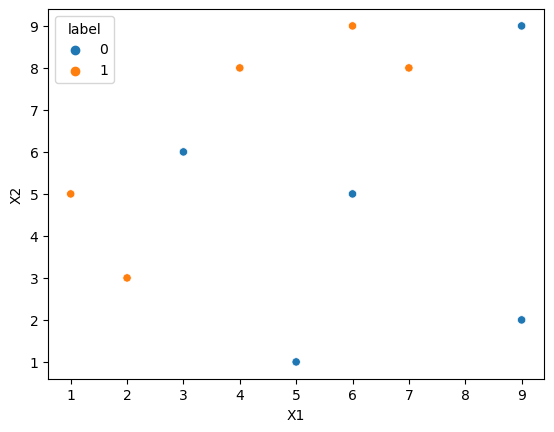

In [58]:
sns.scatterplot(x=df.X1,y=df.X2,hue=df.label)

In [59]:
df.shape[0]

10

In [60]:
df['w'] = 1/df.shape[0]

In [61]:
df.head()

,X1,X2,label,w
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [63]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
     

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

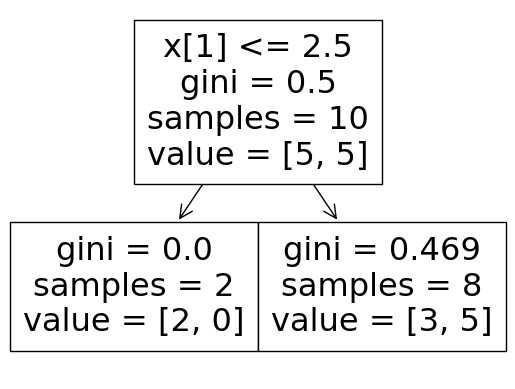

In [64]:
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X,y)
plot_tree(dtc)

<Axes: >

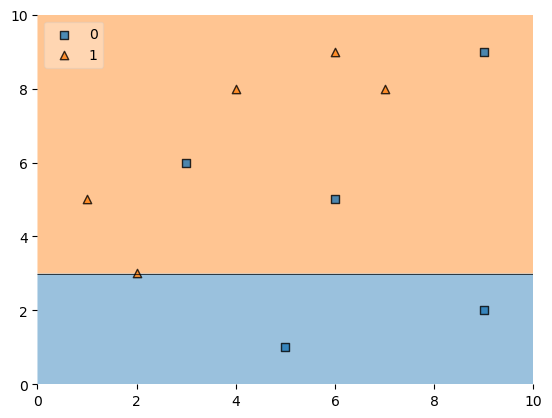

In [65]:
plot_decision_regions(X=X,y=y,clf=dtc,legend=2)

In [66]:
df ['ypred1'] = dtc.predict(X)

In [102]:
df

,X1,X2,label,w,ypred1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [103]:
def cal_er(error):
    return 0.5*np.log((1-error)/error)

In [106]:
alpha = cal_er(0.3)
alpha

0.42364893019360184

In [110]:
def update_row_weight(row,al=0.423):
    if row ['label'] == row['ypred1']:
        return row['w']*np.exp(-al)
    else:
        return row['w']*np.exp(al)

In [112]:
df['Wn'] = df.apply(update_row_weight,axis=1)
df

,X1,X2,label,w,ypred1,Wn
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [113]:
df['Wn'].sum()

0.9165153319682015

In [114]:
df['Wn'] = df['Wn']/df['Wn'].sum()

In [115]:
df

,X1,X2,label,w,ypred1,Wn
0,1,5,1,0.1,1,0.071475
1,2,3,1,0.1,1,0.071475
2,3,6,0,0.1,1,0.166559
3,4,8,1,0.1,1,0.071475
4,5,1,0,0.1,0,0.071475
5,6,9,1,0.1,1,0.071475
6,6,5,0,0.1,1,0.166559
7,7,8,1,0.1,1,0.071475
8,9,9,0,0.1,1,0.166559
9,9,2,0,0.1,0,0.071475


In [116]:
df['Wn'].sum()

1.0

In [117]:
df['Urange'] = np.cumsum(df['Wn'])
df

,X1,X2,label,w,ypred1,Wn,Urange
0,1,5,1,0.1,1,0.071475,0.071475
1,2,3,1,0.1,1,0.071475,0.142950
2,3,6,0,0.1,1,0.166559,0.309508
3,4,8,1,0.1,1,0.071475,0.380983
4,5,1,0,0.1,0,0.071475,0.452458
5,6,9,1,0.1,1,0.071475,0.523933
6,6,5,0,0.1,1,0.166559,0.690492
7,7,8,1,0.1,1,0.071475,0.761967
8,9,9,0,0.1,1,0.166559,0.928525
9,9,2,0,0.1,0,0.071475,1.000000


In [119]:
df['Lrange'] =  df['Urange'] - df['Wn']
df

,X1,X2,label,w,ypred1,Wn,Urange,Lrange
0,1,5,1,0.1,1,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.071475,1.000000,0.928525


In [120]:
df.columns

Index(['X1', 'X2', 'label', 'w', 'ypred1', 'Wn', 'Urange', 'Lrange'], dtype='object')

In [125]:
df = df[['X1', 'X2', 'label', 'w', 'ypred1', 'Wn', 'Lrange','Urange']]
df

,X1,X2,label,w,ypred1,Wn,Lrange,Urange
0,1,5,1,0.1,1,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.071475,0.071475,0.142950
2,3,6,0,0.1,1,0.166559,0.142950,0.309508
3,4,8,1,0.1,1,0.071475,0.309508,0.380983
4,5,1,0,0.1,0,0.071475,0.380983,0.452458
5,6,9,1,0.1,1,0.071475,0.452458,0.523933
6,6,5,0,0.1,1,0.166559,0.523933,0.690492
7,7,8,1,0.1,1,0.071475,0.690492,0.761967
8,9,9,0,0.1,1,0.166559,0.761967,0.928525
9,9,2,0,0.1,0,0.071475,0.928525,1.000000


In [127]:
np.random.random(10)

array([0.74239076, 0.84317001, 0.35880352, 0.94162406, 0.35733863,
       0.41528614, 0.14349669, 0.49906749, 0.16700239, 0.4507217 ])

In [129]:
np.random.randint(10)

7

In [137]:
def new_datase(df):
    indices = []
    for i in range (df.shape[0]):
        a=np.random.random(1)
        for i,r in df.iterrows():
            if r['Lrange'] < a and a < r['Urange']:
                  indices.append(i)
    return indices


In [150]:
err_index = new_datase(df)


In [155]:
ndf = df.iloc[err_index].iloc[:,:4]
ndf

,X1,X2,label,w
4,5,1,0,0.1
1,2,3,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1


In [156]:
clf2 = DecisionTreeClassifier(max_depth=1)

In [167]:
X = ndf.iloc[:,:2].values
y = ndf.iloc[:,2].values

In [168]:
clf2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]')]

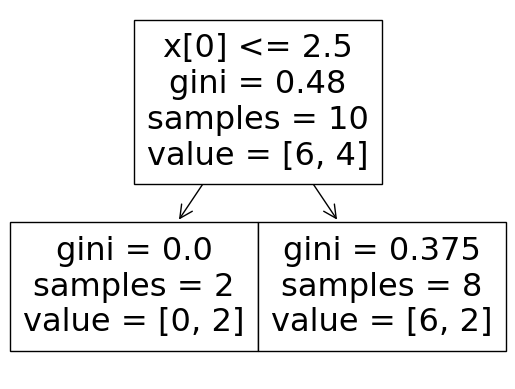

In [169]:
plot_tree(clf2)

<Axes: >

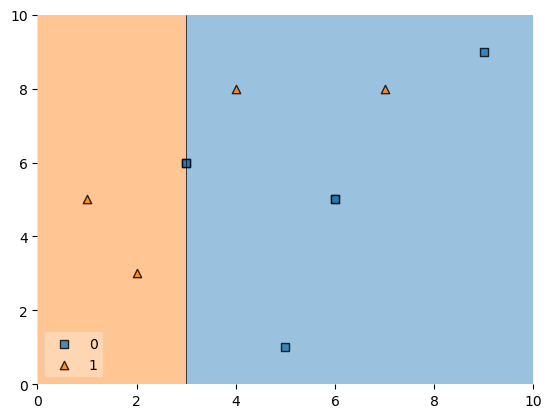

In [170]:
plot_decision_regions(X,y,clf2, legend=3)

In [174]:
ndf['ypred'] = clf2.predict(X)
ndf

,X1,X2,label,w,ypred
4,5,1,0,0.1,0
1,2,3,1,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
6,6,5,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0
2,3,6,0,0.1,0
3,4,8,1,0.1,0


In [179]:
alpha2 = cal_er(ndf[ndf['label']!=ndf['ypred']]['w'].sum())
alpha2

0.6931471805599453

In [178]:
ndf[ndf['label']!=ndf['ypred']]['w'].sum()

0.2

In [189]:
ndf['ypred']

4    0
1    1
2    0
6    0
7    0
6    0
0    1
8    0
2    0
3    0
Name: ypred, dtype: int64

In [198]:
def wn(row,alpha2=0.69):
    if row['label'] == row['ypred']:
        return row['w']*np.exp(-alpha2)
    else:
        return row['w']*np.exp(alpha2)

In [200]:
ndf['Wn']= ndf.apply(wn,axis=1)

In [206]:
ndf['Wn'] = ndf['Wn']/ndf['Wn'].sum()

In [210]:
ndf['Urange'] = np.cumsum(ndf['Wn'])

In [211]:
ndf

,X1,X2,label,w,ypred,Wn,Urange
4,5,1,0,0.1,0,0.062697,0.062697
1,2,3,1,0.1,1,0.062697,0.125393
2,3,6,0,0.1,0,0.062697,0.188090
6,6,5,0,0.1,0,0.062697,0.250787
7,7,8,1,0.1,0,0.249213,0.500000
6,6,5,0,0.1,0,0.062697,0.562697
0,1,5,1,0.1,1,0.062697,0.625393
8,9,9,0,0.1,0,0.062697,0.688090
2,3,6,0,0.1,0,0.062697,0.750787
3,4,8,1,0.1,0,0.249213,1.000000


In [213]:
ndf['Lrange'] = ndf['Urange'] - ndf['Wn']

In [222]:
ndf = ndf[['X1', 'X2', 'label', 'w', 'ypred', 'Wn', 'Lrange','Urange']]
ndf

,X1,X2,label,w,ypred,Wn,Lrange,Urange
4,5,1,0,0.1,0,0.062697,0.000000,0.062697
1,2,3,1,0.1,1,0.062697,0.062697,0.125393
2,3,6,0,0.1,0,0.062697,0.125393,0.188090
6,6,5,0,0.1,0,0.062697,0.188090,0.250787
7,7,8,1,0.1,0,0.249213,0.250787,0.500000
6,6,5,0,0.1,0,0.062697,0.500000,0.562697
0,1,5,1,0.1,1,0.062697,0.562697,0.625393
8,9,9,0,0.1,0,0.062697,0.625393,0.688090
2,3,6,0,0.1,0,0.062697,0.688090,0.750787
3,4,8,1,0.1,0,0.249213,0.750787,1.000000


In [218]:
def random_index(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['Lrange']<a and a< row['Urange']:
                indices.append(index)
    return indices

In [220]:
random_index(ndf)

[0, 8, 3, 7, 7, 2, 3, 2, 7, 3]

In [226]:
ndf3 = ndf.iloc[random_index(ndf)]